# Predicting Car Prices
***

In this project, I'll explore the work flow of machine learning using the k-nearest neighbors algorithm to predict a car's market price using its attributes. First build a train/test model to experiment using different sets of features and k neighbors.  Then use a k-fold cross validation model to experiment with different k-folds.

The data set contains information on various cars about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. The data set here can be downloaded directly from _[here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data)_.


### Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)
cars.head()


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
cars.dtypes


symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-rate     float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

### Data Cleanup

we usually can't have any missing values if we want to use them for predictive modeling.  we can tell that the normalized-losses column contains missing values represented using "?".

#### Select columns with continuous value


In [4]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


#### Replace all the ? values in the dataframe

In [5]:
numeric_cars = numeric_cars.replace('?', np.nan)
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [6]:
numeric_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
bore                 201 non-null object
stroke               201 non-null object
compression-rate     205 non-null float64
horsepower           203 non-null object
peak-rpm             203 non-null object
city-mpg             205 non-null int64
highway-mpg          205 non-null int64
price                201 non-null object
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


#### Change columns to numeric data type

In [7]:
numeric_cars = numeric_cars.astype(float)
numeric_cars.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
normalized-losses    164 non-null float64
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null float64
bore                 201 non-null float64
stroke               201 non-null float64
compression-rate     205 non-null float64
horsepower           203 non-null float64
peak-rpm             203 non-null float64
city-mpg             205 non-null float64
highway-mpg          205 non-null float64
price                201 non-null float64
dtypes: float64(14)
memory usage: 22.5 KB


In [8]:
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

Since "price" is the column that we predict.  It can't contain missing values.

#### Remove rows with missing value in "price"

In [9]:
numeric_cars.dropna(subset=['price'], axis=0, inplace=True)
numeric_cars.isnull().sum()


normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

#### Replace missing values in other columns with columns means

In [10]:
#numeric_cars.fillna(value=numeric_cars.mean(), inplace=True)
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.head(10)

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
5,122.0,99.8,177.3,66.3,53.1,2507.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,15250.0
6,158.0,105.8,192.7,71.4,55.7,2844.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,17710.0
7,122.0,105.8,192.7,71.4,55.7,2954.0,3.19,3.40,8.5,110.0,5500.0,19.0,25.0,18920.0
8,158.0,105.8,192.7,71.4,55.9,3086.0,3.13,3.40,8.3,140.0,5500.0,17.0,20.0,23875.0
10,192.0,101.2,176.8,64.8,54.3,2395.0,3.50,2.80,8.8,101.0,5800.0,23.0,29.0,16430.0


In [11]:
numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


It is confirmed there is no missing value or NaN.

#### Normalize the numeric columns except price column to the range of 0 to 1

In [12]:
price_col = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min()) / (numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price_col
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [13]:
numeric_cars.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


### Univariate k-nearest neighbors Model

#### Develop the univariate model

In [14]:
def knn_train_test(feature_col, target_col, df):
    #Instantiate the KNeighborsRegressor
    knn = KNeighborsRegressor()
    
    #Randomize order of rows in the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Split dataframe into two equal length dataset
    half_length = int(df.shape[0] / 2)
    train_df = rand_df.iloc[0:half_length]
    test_df = rand_df.iloc[half_length:]
    
    #Fit the model on the training set
    knn.fit(train_df[[feature_col]], train_df[target_col])

    #Make predictions on the test set
    predictions = knn.predict(test_df[[feature_col]])
    
    #Calcuta the RMSE
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    
    return rmse   


#### Use the univariate model to train and test on different numeric columns in the data set

In [15]:
# For each column (minus `price`), train a model, return 
# RMSE value and add to the dictionary `rmses`.
features = numeric_cars.columns.drop('price')

rmses = {}
for feature in features:
    rmses[feature] = knn_train_test(feature, 'price', numeric_cars)
    #temp.append(knn_train_test(feature, 'price', numeric_cars))
    
# create pandas Series from rmses dict to sort the rmse values
pd.Series(rmses).sort_values()

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

"horsepower" column has the lowest RMSE to predict "price" using the default k value.  Modify the knn_train_test() function to accept a parameter for the k value.

In [16]:
def knn_train_test_k(k, feature_col, target_col, df):
    #Instantiate the KNeighborsRegressor
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #Randomize order of rows in the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Split dataframe into two equal length dataset
    half_length = int(df.shape[0] / 2)
    train_df = rand_df.iloc[0:half_length]
    test_df = rand_df.iloc[half_length:]
    
    #Fit the model on the training set
    knn.fit(train_df[[feature_col]], train_df[target_col])

    #Make predictions on the test set
    predictions = knn.predict(test_df[[feature_col]])
    
    #Calcuta the RMSE
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    
    return rmse 

#### For each numeric column, create, train, and test a univariate model using the following k values (1, 3, 5, 7, and 9).

In [17]:
k_vals = [1, 3, 5, 7, 9]
k_rmses = {}
for feature in features:
    rmses = []
    for k in k_vals:
        rmses.append(knn_train_test_k(k, feature, 'price', numeric_cars))
    k_rmses[feature] = rmses
    
k_rmses

{'bore': [8602.58848450066,
  6984.239489480916,
  6780.627784685976,
  6878.097965921532,
  6866.808502038413],
 'city-mpg': [5901.143574354764,
  4646.746408727155,
  4766.422505090134,
  5232.523034167316,
  5465.209492527533],
 'compression-rate': [8087.205346523092,
  7375.063685578359,
  6610.812153159129,
  6732.801282941515,
  7024.485525463435],
 'curb-weight': [5264.290230758878,
  5022.318011757233,
  4401.118254793124,
  4330.608104418053,
  4632.044474454401],
 'height': [8904.04645636071,
  8277.609643045525,
  8144.441042663747,
  7679.598124393773,
  7811.03606291223],
 'highway-mpg': [6025.594966720739,
  4617.305019788554,
  4630.026798588056,
  4796.061440186946,
  5278.358056953987],
 'horsepower': [4170.054848037801,
  4020.8492630885394,
  4037.0377131537603,
  4353.811860277134,
  4515.135617419103],
 'length': [4628.45550121557,
  5129.8358210721635,
  5427.2009608367125,
  5313.427720847974,
  5383.054514833446],
 'normalized-losses': [7846.750605148984,
  7500

#### Visualize the knn_train_test_k() result 

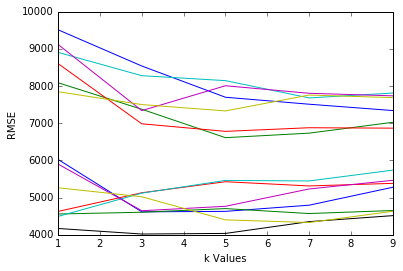

In [18]:
for feature, rmses in k_rmses.items():
    x = k_vals
    y = rmses
    plt.plot(x, y)
    plt.xlabel('k Values')
    plt.ylabel('RMSE')
    #plt.legend(feature)

### Multivariate Model


In [19]:
def knn_train_test_m(feature_cols, target_col, df):
    #Instantiate the KNeighborsRegressor
    knn = KNeighborsRegressor()
    
    #Randomize order of rows in the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Split dataframe into two equal length dataset
    half_length = int(df.shape[0] / 2)
    train_df = rand_df.iloc[0:half_length]
    test_df = rand_df.iloc[half_length:]
    
    #Fit the model on the training set
    knn.fit(train_df[feature_cols], train_df[target_col])

    #Make predictions on the test set
    predictions = knn.predict(test_df[feature_cols])
    
    #Calcuta the RMSE
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    
    return rmse   


#### Use the best 2 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [20]:
features_2 = ['horsepower', 'curb-weight']
rmse_2_features = knn_train_test_m(features_2, 'price', numeric_cars)
print(rmse_2_features)

3257.849049435976


#### Use the best 3 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

In [21]:
features_3 = ['horsepower', 'curb-weight', 'highway-mpg']
rmse_3_features = knn_train_test_m(features_3, 'price', numeric_cars)
print(rmse_3_features)

3365.9110004529675


#### Use the best 4 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value

In [22]:
features_4 = ['horsepower', 'curb-weight', 'highway-mpg', 'width']
rmse_4_features = knn_train_test_m(features_4, 'price', numeric_cars)
print(rmse_4_features)

3358.6915801682458


#### Use the best 5 features from the previous step to train and test a multivariate k-nearest neighbors model using the default k value.

In [23]:
features_5 = ['horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg']
rmse_5_features = knn_train_test_m(features_5, 'price', numeric_cars)
print(rmse_5_features)

3341.6024539726504


RMSE is lowest when just jusing best 2 features to train and test the multivariate k-nearest neighbors model.  Adding more top features to the model doesn't decrease RMSE further.

#### Optimize the top models from the above by varying the hyperparameter value from 1 to 25


In [26]:
def knn_train_test_m_k(k, feature_cols, target_col, df):
    #Instantiate the KNeighborsRegressor with k
    knn = KNeighborsRegressor(n_neighbors=k)
    
    #Randomize order of rows in the dataframe
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)
    
    #Split dataframe into two equal length dataset
    half_length = int(df.shape[0] / 2)
    train_df = rand_df.iloc[0:half_length]
    test_df = rand_df.iloc[half_length:]
    
    #Fit the model on the training set
    knn.fit(train_df[feature_cols], train_df[target_col])

    #Make predictions on the test set
    predictions = knn.predict(test_df[feature_cols])
    
    #Calcuta the RMSE
    rmse = np.sqrt(mean_squared_error(test_df[target_col], predictions))
    
    return rmse   


In [27]:
result = {}

features_2 = ['horsepower', 'curb-weight']
k_m_2_rmse = {}
for k in range(1, 26):
    k_m_2_rmse[k] = knn_train_test_m_k(k, features_2, 'price', numeric_cars)
result['top_features_2'] = k_m_2_rmse

features_3 = ['horsepower', 'curb-weight', 'highway-mpg']
k_m_3_rmse = {}
for k in range(1, 26):
    k_m_3_rmse[k] = knn_train_test_m_k(k, features_3, 'price', numeric_cars)
result['top_features_3'] = k_m_3_rmse

features_4 = ['horsepower', 'curb-weight', 'highway-mpg', 'width']
k_m_4_rmse = {}
for k in range(1, 26):
    k_m_4_rmse[k] = knn_train_test_m_k(k, features_4, 'price', numeric_cars)
result['top_features_4'] = k_m_4_rmse

features_5 = ['horsepower', 'curb-weight', 'highway-mpg', 'width', 'city-mpg']
k_m_5_rmse = {}
for k in range(1, 26):
    k_m_5_rmse[k] = knn_train_test_m_k(k, features_5, 'price', numeric_cars)
result['top_features_5'] = k_m_3_rmse

result

{'top_features_2': {1: 2790.1071433346656,
  2: 2700.7472352504356,
  3: 3003.7488055243016,
  4: 3106.605625597663,
  5: 3257.849049435976,
  6: 3660.48709284375,
  7: 3776.622550248818,
  8: 3990.519746861657,
  9: 4106.695501428088,
  10: 4292.927729786319,
  11: 4446.49068863902,
  12: 4474.5040774983045,
  13: 4535.433105685562,
  14: 4557.787134869417,
  15: 4626.44623473615,
  16: 4616.715111529423,
  17: 4627.590528180833,
  18: 4591.404760116439,
  19: 4602.10047883103,
  20: 4609.448817726754,
  21: 4643.491685319764,
  22: 4652.902519818285,
  23: 4697.632838416021,
  24: 4738.027378987156,
  25: 4760.49488106037},
 'top_features_3': {1: 2777.396403500627,
  2: 2748.3975105936956,
  3: 2974.222577144125,
  4: 3044.7311186338325,
  5: 3365.9110004529675,
  6: 3753.3453221807013,
  7: 4002.283314211729,
  8: 4122.1233863450125,
  9: 4229.9489661319985,
  10: 4336.475078509578,
  11: 4495.725032539499,
  12: 4624.353323929217,
  13: 4621.50491988593,
  14: 4607.848304334326,
  

From the above result, for each model, RMSE increases as k increases.  2600.7 is the lowest RMSE when k = 1 for each train/test model with different top features.  The RMSE is obtained with model using top 4 features of 'horsepower', 'curb-weight', 'highway-mpg', 'width', and k equals to 1.

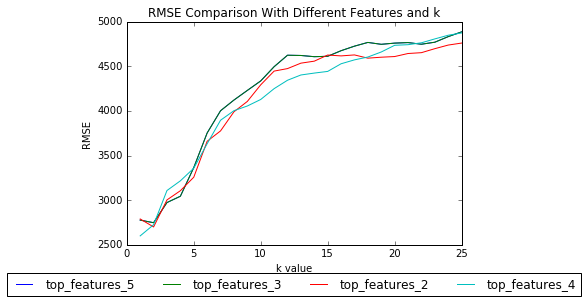

In [28]:
for f, v in result.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label=f)
    plt.xlabel('k value')
    plt.ylabel('RMSE')
    plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=4)
    plt.title('RMSE Comparison With Different Features and k')
    plt.savefig('rmse_m_k.png')

#### Modify the model use k-fold cross validation instead of test/train validation

In [35]:
def knn_k_fold(k, feature_cols, target_col, df):
    #Instantiate the KNeighborsRegressor
    knn = KNeighborsRegressor()
    #Instantiate the KFold
    kf = KFold(k, shuffle=True, random_state=1)
    
    #Calcuta the RMSE
    mses = cross_val_score(knn, df[feature_cols], df[target_col], scoring='neg_mean_squared_error', cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    avg_rmses = np.mean(rmses)
    return avg_rmses

In [39]:
features_4 = ['horsepower', 'curb-weight', 'highway-mpg', 'width']
avg_rmses_result = {}
for k in range(2, 11):
    avg_rmses = knn_k_fold(k, features_4, 'price', numeric_cars)
    avg_rmses_result[k] = avg_rmses             
avg_rmses_result  


{2: 3278.4029729931435,
 3: 3018.1763280818377,
 4: 2962.359134921209,
 5: 2920.6998763538077,
 6: 2839.9988726945867,
 7: 2936.8539605376177,
 8: 2821.898043318729,
 9: 2744.4696969284055,
 10: 2848.278751201201}

2744.5 is the lowest RMSE with k-fold cross_validation model is achieved at k-fold at 9 for top_4 features.

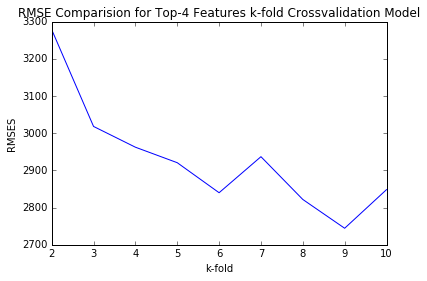

In [42]:
x = list(avg_rmses_result.keys())
y = list(avg_rmses_result.values())
plt.plot(x, y)
plt.xlabel('k-fold')
plt.ylabel('RMSES')
plt.title('RMSE for Top-4 Features k-fold Crossvalidation Model')
plt.savefig('rmse_k_fold.png')


### Conclusion:

It is best to predict car price using top 4 features of 'horsepower', 'curb-weight', 'highway-mpg', 'width' with the least error based on the above analysis involving the k-nearest neighbors machine learning algorithm.
